EXP3: Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, log_loss, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import json

Loading the dataset.

In [2]:
dataset = pd.read_csv('../Dataset/dataset_B_05_2020.csv')

Extracting X and Y from the Dataset.

In [3]:
X = dataset.drop('url', axis = 1).drop('status', axis = 1)
Y = [1 if i == 'legitimate' else 0 for i in dataset['status']]

Splitting the dataset into Training data and Validation data(Test Data).

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

Scaling the data

In [5]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

Defining a common training funtion for diffferent models.

Returns the Time taken, Accuracy, Macro f1 score and the trained model.

In [6]:
def training(model, x_train, y_train, x_test, y_test):
    tic = time.time()
    model.fit(x_train, y_train)
    toc = time.time()
    train_time = toc - tic
    y_pred = model.predict(x_test)
    accuracy = np.round(accuracy_score(y_test, y_pred), 4)
    macro_f1 = np.round(f1_score(y_test, y_pred), 4)
    recall = np.round(recall_score(y_test, y_pred), 4)
    logl = np.round(log_loss(y_test, y_pred), 4)
    print(f'Train Size = {len(y_train)}, Test Size = {len(y_test)}')
    print(f'Time taken = {train_time}')
    print(f'Accuracy = {accuracy}')
    print(f'Macro F1 Score = {macro_f1}')
    print(f'Recall = {recall}')
    print(f'Log Loss = {logl}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)
    plt.show()
    return [model, train_time, accuracy, macro_f1, recall, logl]

model_comp = {}
params = {}

Model 1: Support Vector Classification.

Model: Support Vector Model
Train Size = 8001, Test Size = 3429
Time taken = 468.69710302352905
Accuracy = 0.9615
Macro F1 Score = 0.9618
Recall = 0.9602
Log Loss = 1.3875
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1697
           1       0.96      0.96      0.96      1732

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429

Confusion Matrix:


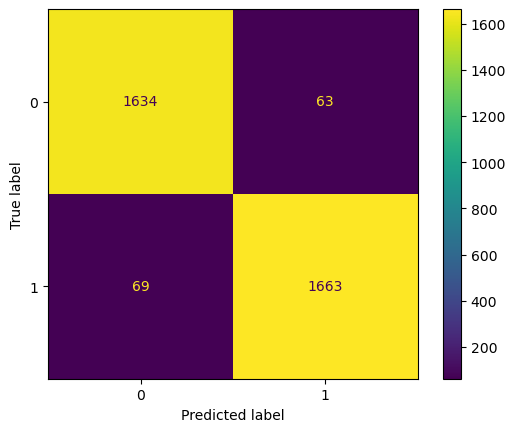

Selected Hyper Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [7]:
def svm(x_train, y_train, x_test, y_test): 
    svm_model = SVC()
    param_grid = {
        'kernel':['linear','rbf'],
        'C':[1, 10, 20],
        'gamma':['auto','scale']
    }
    model = GridSearchCV(svm_model, param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Support Vector Model')
    return training(model, x_train, y_train, x_test, y_test)
model_comp['svm'] = svm(x_train_sc, y_train, x_test_sc, y_test)
params['svm'] = model_comp['svm'][0].best_params_
print('Selected Hyper Parameters:', params['svm'])

Model 2: Logistic Reggression Classifier.

Model: Logistic Regression
Train Size = 8001, Test Size = 3429
Time taken = 55.91128945350647
Accuracy = 0.9495
Macro F1 Score = 0.9502
Recall = 0.9532
Log Loss = 1.8185
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1697
           1       0.95      0.95      0.95      1732

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429

Confusion Matrix:


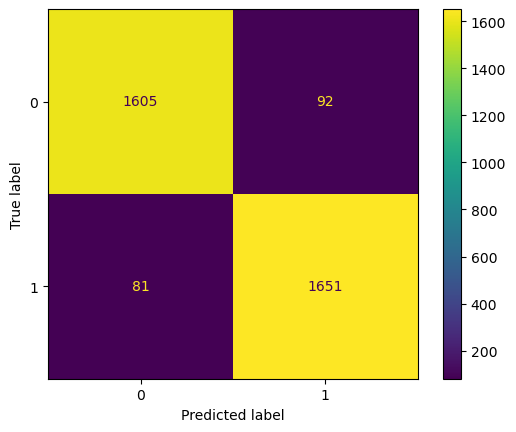

Selected Hyper Parameters: {'C': 100.0, 'penalty': 'l2'}


In [8]:
def logistic_regression(x_train, y_train, x_test, y_test):
    logistic_model = LogisticRegression(solver = 'liblinear', max_iter = 1000)
    param_grid = {
    'penalty':['l1', 'l2'],
    'C': np.logspace(0, 10, 6)
    }    
    model = GridSearchCV(logistic_model, param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Logistic Regression')
    return training(model, x_train, y_train, x_test, y_test)
model_comp['logistic_regression'] = logistic_regression(x_train_sc, y_train, x_test_sc, y_test)
params['logistic_regression'] = model_comp['logistic_regression'][0].best_params_
print('Selected Hyper Parameters:', params['logistic_regression'])

Model 3: Decision Tree Classifier.

Model: Decision Tree Model
Train Size = 8001, Test Size = 3429
Time taken = 22.370049238204956
Accuracy = 0.9323
Macro F1 Score = 0.9324
Recall = 0.9244
Log Loss = 2.4386
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1697
           1       0.94      0.92      0.93      1732

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429

Confusion Matrix:


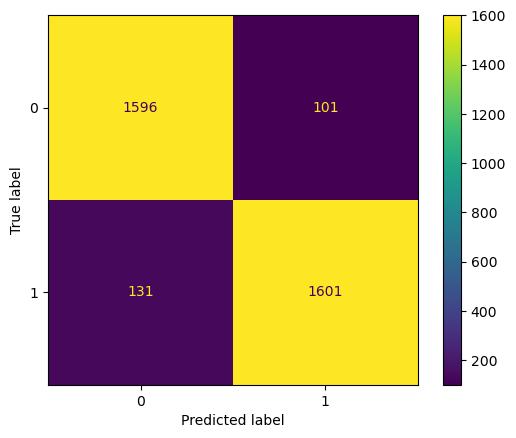

Selected Hyper Parameters: {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 30}


In [9]:
def decision_tree(x_train, y_train, x_test, y_test):
    decision_tree_model = DecisionTreeClassifier()
    param_grid = {
        'max_depth': [25, 30, 25],
        'min_samples_leaf': [1, 5, 10],
        'min_samples_split': [25, 30, 35],
    }   
    model = GridSearchCV(decision_tree_model, param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Decision Tree Model')
    return training(model, x_train, y_train, x_test, y_test)
model_comp['decision_tree'] = decision_tree(x_train_sc, y_train, x_test_sc, y_test)
params['decision_tree'] = model_comp['decision_tree'][0].best_params_
print('Selected Hyper Parameters:', params['decision_tree'])

Model 4: Random Forest Classifier

Model: Random Forest Model
Train Size = 8001, Test Size = 3429
Time taken = 190.61687994003296
Accuracy = 0.9673
Macro F1 Score = 0.9678
Recall = 0.9711
Log Loss = 1.1773
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1697
           1       0.96      0.97      0.97      1732

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429

Confusion Matrix:


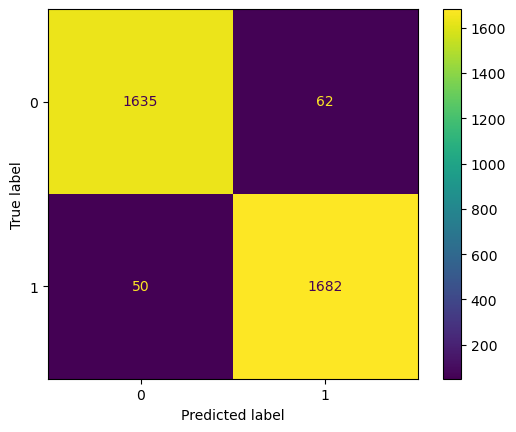

Selected Hyper Parameters: {'max_depth': 25, 'max_leaf_nodes': 450, 'min_samples_split': 1}


In [10]:
def random_forest(x_train, y_train, x_test, y_test):      
    random_forest_model = RandomForestClassifier(n_estimators = 150)
    param_grid = {    
        'max_depth':[20, 25, 30], 
        'max_leaf_nodes': [400, 450, 475], 
        'min_samples_split': [1, 5]
    }     
    model = GridSearchCV(random_forest_model, param_grid, scoring = 'accuracy', cv = 10)
    print('Model: Random Forest Model')
    return training(model, x_train, y_train, x_test, y_test)
model_comp['random_forest'] = random_forest(x_train_sc, y_train, x_test_sc, y_test)
params['random_forest'] = model_comp['random_forest'][0].best_params_
print('Selected Hyper Parameters:', params['random_forest'])

Saving the selected Hyperparameters

In [11]:
filename  = '../Files/param.txt'
with open(filename, 'w') as f:
    json.dump(params, f)

Model Comparison

,Time Taken,Accuracy,Macro F1 Score,Recall,Log Loss
svm,468.697103,0.9615,0.9618,0.9602,1.3875
logistic_regression,55.911289,0.9495,0.9502,0.9532,1.8185
decision_tree,22.370049,0.9323,0.9324,0.9244,2.4386
random_forest,190.616880,0.9673,0.9678,0.9711,1.1773


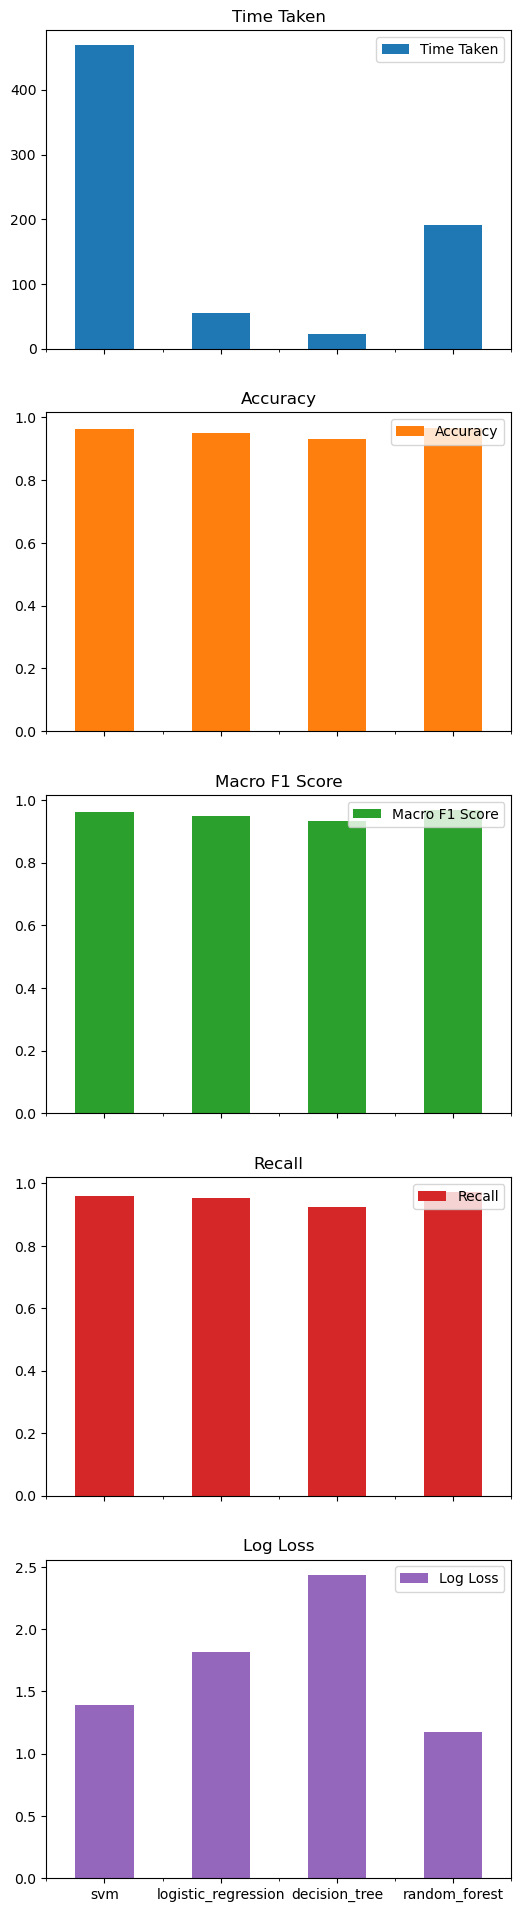

In [12]:
plots = ['Time Taken', 'Accuracy', 'Macro F1 Score', 'Recall', 'Log Loss']
model_values = [i[1:] for i in model_comp.values()]
comp = pd.DataFrame(model_values, index = list(model_comp.keys()), columns = plots)
display(comp)

axs = comp.plot.bar(subplots=True, figsize=(6,24), rot=0)
axs[1].legend()
plt.show()